<a href="https://colab.research.google.com/github/FernandoPZ/ExtraccionDeConocimientosDeBaseDeDatos/blob/main/Train_and_evaluate_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenar y evaluar modelos de regresión

# Introducción

*Regresión* es donde los modelos predicen un número.

En el aprendizaje automático, el objetivo de la regresión es crear un modelo que pueda predecir un valor numérico cuantificable, como un precio, una cantidad, un tamaño u otro número escalar.

La regresión es una técnica estadística de fundamental importancia para la ciencia debido a su facilidad de interpretación, robustez y rapidez en el cálculo. Los modelos de regresión proporcionan una base excelente para comprender cómo funcionan las técnicas de aprendizaje automático más complejas.

En situaciones del mundo real, particularmente cuando hay pocos datos disponibles, los modelos de regresión son muy útiles para hacer predicciones. Por ejemplo, si una empresa que alquila bicicletas desea predecir el número esperado de alquileres en un día determinado en el futuro, un modelo de regresión puede predecir este número. Se podría crear un modelo utilizando datos existentes, como el número de bicicletas que se alquilaron en los días en los que también se registraron la temporada, el día de la semana, etc.

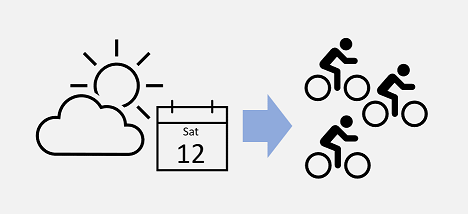

# Requisitos previos
- Conocimientos de matemáticas básicas
- Algo de experiencia programando en Python

# Objetivos de aprendizaje
En este módulo, podrá:
- Cuándo utilizar modelos de regresión.
- Cómo entrenar y evaluar modelos de regresión usando el marco Scikit-Learn.

# ¿Qué es la regresión?

La regresión funciona estableciendo una relación entre las variables en los datos que representan *features*, conocidas como características, de lo que se observa y la variable que estamos tratando de predecir, conocida como *label*. Recuerde nuestra empresa que alquila bicicletas y quiere predecir el número esperado de alquileres en un día determinado. En este caso, las características incluyen elementos como el día de la semana, el mes, etc., mientras que la etiqueta es el número de alquileres de bicicletas.

Para entrenar el modelo, comenzamos con una muestra de datos que contiene las características, así como valores conocidos para la etiqueta, por lo que en este caso necesitamos datos históricos que incluyan fechas, condiciones climáticas y el número de alquileres de bicicletas.

Luego, dividiremos esta muestra de datos en dos subconjuntos:

- Un conjunto de datos de *entrenamiento* al que aplicaremos un algoritmo que determina una función que encapsula la relación entre los valores de la característica y los valores de etiqueta conocidos.
- Una *validación* o un conjunto de datos de prueba que podemos usar para evaluar el modelo usándolo para generar predicciones para la etiqueta y compararlas con los valores de etiqueta conocidos reales.

El uso de datos históricos con valores de etiqueta conocidos para entrenar un modelo hace que la regresión sea un ejemplo de aprendizaje automático supervisado.

## Un ejemplo simple

Tomemos un ejemplo sencillo para ver cómo funciona en principio el proceso de formación y evaluación. Suponga que simplificamos el escenario de modo que usamos una sola característica (temperatura diaria promedio) para predecir la etiqueta de alquiler de bicicletas.

Comenzamos con algunos datos que incluyen valores conocidos para la función de temperatura diaria promedio y la etiqueta de alquiler de bicicletas.

| Temperatura | Alquileres |
|-------------|------------|
| 56 | 115 |
| 61 | 126 |
| 67 | 137 |
| 72 | 140 |
| 76 | 152 |
| 82 | 156 |
| 54 | 114 |
| 62 | 129 |

Ahora seleccionaremos al azar cinco de estas observaciones y las usaremos para entrenar un modelo de regresión. Cuando hablamos de 'entrenar un modelo', lo que queremos decir es encontrar una función (una ecuación matemática; llamémosla **f**) que pueda usar la función de temperatura (que llamaremos **x**) para calcular el número de alquileres (que llamaremos **y**). En otras palabras, necesitamos definir la siguiente función: **f(x) = y**.

Nuestro conjunto de datos de entrenamiento se ve así:

| X | Y |
|----|----|
| 56 | 115 |
| 61 | 126 |
| 67 | 137 |
| 72 | 140 |
| 76 | 152 |

Comencemos trazando los valores de entrenamiento para ***x*** e ***y*** en un gráfico:

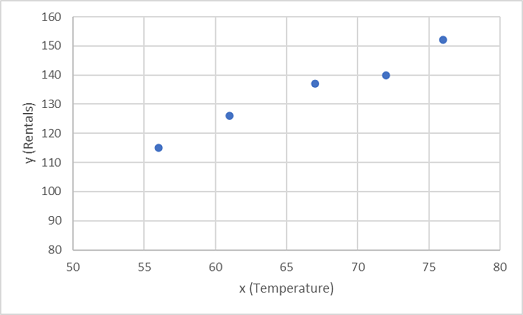

Ahora necesitamos ajustar estos valores a una función, permitiendo alguna variación aleatoria. Probablemente pueda ver que los puntos trazados forman una línea diagonal casi recta; en otras palabras, hay una relación lineal aparente entre ***x*** e ***y***, por lo que necesitamos encontrar una función lineal que se ajuste mejor a la muestra de datos. Hay varios algoritmos que podemos usar para determinar esta función, que finalmente encontrará una línea recta con una variación general mínima de los puntos graficados; como esto:

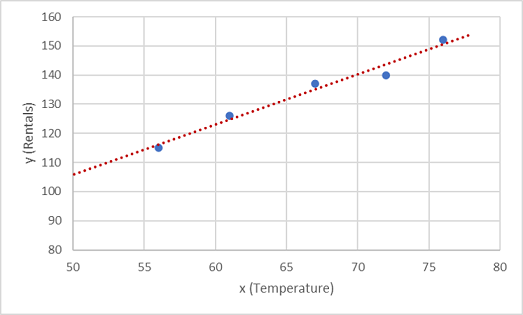

La línea representa una función lineal que se puede usar con cualquier valor de ***x*** para aplicar la pendiente de la línea y su intersección (donde la línea cruza el eje ***y*** cuando ***x*** es 0) para calcular y. En este caso, si extendimos la línea hacia la izquierda, encontraríamos que cuando ***x*** es 0, y es alrededor de 20, y la pendiente de la línea es tal que por cada unidad de ***x*** que se mueve hacia la derecha, ***y*** aumenta alrededor de 1,7. Por tanto, nuestra función ***f*** se puede calcular como 20 + 1,7***x***.

Ahora que hemos definido nuestra función predictiva, podemos usarla para predecir etiquetas para los datos de validación que retenemos y comparar los valores predichos (que normalmente indicamos con el símbolo ***ŷ***, o "y-hat") con los valores y reales conocidos.

| x | y | ŷ |
|---|---|---|
| 82 | 156 | 159.4 |
| 54 | 114 | 111.8 |
| 62 | 129 | 125.4 |

Veamos cómo se comparan los valores de y e ŷ en una gráfica:

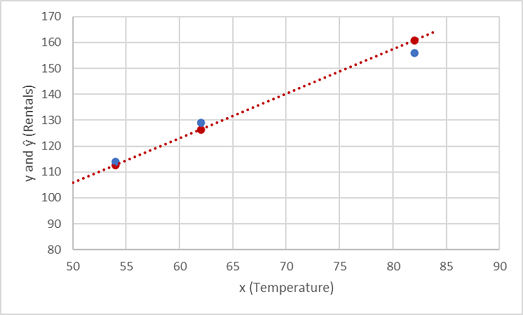

Los puntos graficados que están en la línea de la función son los valores ***ŷ*** predichos calculados por la función, y los otros puntos graficados son los valores ***y*** reales.

Hay varias formas en que podemos medir la varianza entre los valores predichos y reales, y podemos usar estas métricas para evaluar qué tan bien predice el modelo.

> **Nota**
> El aprendizaje automático se basa en estadísticas y matemáticas, y es importante conocer los términos específicos que usan los estadísticos y matemáticos (y, por lo tanto, los científicos de datos). Puede pensar en la diferencia entre un valor de etiqueta *predicho* y el valor de etiqueta real como una medida de ***error***. Sin embargo, en la práctica, los valores "reales" se basan en observaciones de muestra (que a su vez pueden estar sujetas a alguna variación aleatoria). Para dejar en claro que estamos comparando un valor predicho (ŷ) con un valor observado (y), nos referimos a la diferencia entre ellos como los residuos. Podemos resumir los residuos de todas las predicciones de datos de validación para calcular la ***pérdida*** general en el modelo como una medida de su rendimiento predictivo.

Una de las formas más comunes de medir la pérdida es elevar al cuadrado los residuos individuales, sumar los cuadrados y calcular la media. Cuadrar los residuos tiene el efecto de basar el cálculo en valores absolutos (ignorando si la diferencia es negativa o positiva) y dar más peso a las diferencias más grandes. Esta métrica se llama ***Error cuadrático medio***.

Para nuestros datos de validación, el cálculo se ve así:

| y | ŷ | y-ŷ | (y - ŷ)^2 |
|---|---|-----|-----------|
| 156 | 159.4 | -3.4 | 11.56 |
| 114 | 111.8 | 2.2 | 4.84 |
| 129 | 125.4 | 3.6 | 12.96 |
|  | Sum | ∑ | 29.36 |
|  | Mean | x̄ | 9.79 |

Entonces, la pérdida para nuestro modelo basado en la métrica MSE es 9.79.

Entonces, ¿eso es bueno? Es difícil saberlo porque el valor de MSE no se expresa en una unidad de medida significativa. Sabemos que cuanto menor es el valor, menor pérdida hay en el modelo; y por lo tanto, mejor es la predicción. Esto hace que sea una métrica útil para comparar dos modelos y encontrar el que funcione mejor.

A veces, es más útil expresar la pérdida en la misma unidad de medida que el valor de la etiqueta predicha, en este caso, la cantidad de alquileres. Es posible hacer esto calculando la raíz cuadrada del MSE, que produce una métrica conocida, como era de esperar, como ***Root Mean Squared Error*** (RMSE).

√9.79 = 3.13

Entonces, el RMSE de nuestro modelo indica que la pérdida es un poco más de 3, lo que puede interpretar libremente como que significa que, en promedio, las predicciones incorrectas son incorrectas en alrededor de 3 alquileres.

Hay muchas otras métricas que se pueden utilizar para medir la pérdida en una regresión. Por ejemplo, **R^2** (**R-cuadrado**) (a veces conocido como *coeficiente de determinación*) es la correlación entre ***x*** e ***y*** al cuadrado. Esto produce un valor entre 0 y 1 que mide la cantidad de varianza que puede explicar el modelo. Por lo general, cuanto más se acerca este valor a 1, mejor predice el modelo.

# Ejercicio: entrenar y evaluar un modelo de regresión

# Regresión

Las técnicas de aprendizaje automático *supervisado* implican entrenar un modelo para operar en un conjunto de *características* y predecir una *etiqueta* utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos. El proceso de entrenamiento *ajusta* las características a las etiquetas conocidas para definir una función general que se puede aplicar a las nuevas características para las que las etiquetas son desconocidas y predecirlas. Puede pensar en esta función así, en la que ***y*** representa la etiqueta que queremos predecir y ***x*** representa las características que usa el modelo para predecirla.

$$y = f(x)$$

En la mayoría de los casos, *x* es en realidad un *vector* que consta de múltiples valores de características, por lo que, para ser un poco más precisos, la función podría expresarse así:

$$y = f([x_1, x_2, x_3, ...])$$

El objetivo de entrenar el modelo es encontrar una función que realice algún tipo de cálculo a los valores *x* que produzca el resultado *y*. Hacemos esto aplicando un * algoritmo * de aprendizaje automático que intenta ajustar los valores *x* a un cálculo que produce *y* con una precisión razonable para todos los casos en el conjunto de datos de entrenamiento.

Hay muchos algoritmos de aprendizaje automático para el aprendizaje supervisado y se pueden dividir en dos tipos:

- **Algoritmos de _regresión_**: Algoritmos que predicen un valor *y* que es un valor numérico, como el precio de una casa o el número de transacciones de venta.
- **Algoritmos de _clasificación_**: Algoritmos que predicen a qué categoría, o *clase*, pertenece una observación. El valor *y* en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.

En este cuaderno, nos centraremos en la *regresión*, utilizando un ejemplo basado en un estudio real en el que se recopilaron datos para un esquema de uso compartido de bicicletas y se usaron para predecir el número de alquileres según la estacionalidad y las condiciones climáticas. Usaremos una versión simplificada del conjunto de datos de ese estudio.

> **Citación**: Los datos utilizados en este ejercicio se derivan de [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) y se utiliza de acuerdo con los [acuerdos de licencia](https://www.capitalbikeshare.com/data-license-agreement).

## Explore los datos

El primer paso en cualquier proyecto de aprendizaje automático es explorar los datos que usará para entrenar un modelo. El objetivo de esta exploración es intentar comprender las relaciones entre sus atributos; en particular, cualquier correlación aparente entre las *características* y la *etiqueta* que su modelo intentará predecir. Esto puede requerir algo de trabajo para detectar y corregir problemas en los datos (como tratar con valores perdidos, errores o valores atípicos), derivar nuevas columnas de características transformando o combinando características existentes (un proceso conocido como *ingeniería de características*), *normalizar* características numéricas (valores que puede medir o contar) para que estén en una escala similar, y *codificar* características categóricas (valores que representan categorías discretas) como indicadores numéricos.

Comencemos cargando los datos de uso compartido de bicicletas como un DataFrame de **Pandas** y viendo las primeras filas.

In [ ]:
import pandas as pd

# cargar el conjunto de datos de entrenamiento
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

Los datos constan de las siguientes columnas:

- **instant**: Un identificador de fila único
- **dteday**: La fecha en la que se observaron los datos; en este caso, los datos se recopilaron diariamente; por lo que hay una fila por fecha.
- **season**: Un valor codificado numéricamente que indica la temporada (1: primavera, 2: verano, 3: otoño, 4: invierno)
- **yr**: El año del estudio en el que se realizó la observación (el estudio se llevó a cabo durante dos años: el año 0 representa 2011 y el año 1 representa 2012)
- **mnth**: El mes del calendario en el que se realizó la observación (1: enero ... 12: diciembre)
- **holiday**: Un valor binario que indica si la observación se realizó o no en un día festivo
- **weekday**: El día de la semana en el que se realizó la observación (0: domingo ... 6: sábado)
- **workingday**: Un valor binario que indica si el día es un día laborable (no un fin de semana o feriado)
- **weathersit**: Un valor categórico que indica la situación meteorológica (1: despejado, 2: niebla / nube, 3: lluvia ligera / nieve, 4: lluvia intensa / granizo / nieve / niebla)
- **temp**: La temperatura en grados Celsius (normalizada)
- **atemp**: La temperatura aparente ("se siente como") en grados Celsius (normalizada)
- **hum**: El nivel de humedad (normalizado)
- **windspeed**: La velocidad del viento (normalizada)
- **rentals**: El número de alquileres de bicicletas registrados.

En este conjunto de datos, **alquileres** representa la etiqueta (el valor *y*) que nuestro modelo debe estar entrenado para predecir. Las otras columnas son características potenciales (valores *x*).

Como se mencionó anteriormente, puede realizar alguna *ingeniería de funciones* para combinar o derivar nuevas funciones. Por ejemplo, agreguemos una nueva columna llamada **day** al marco de datos extrayendo el componente de día de la columna **dteday** existente. La nueva columna representa el día del mes del 1 al 31.

In [ ]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descriptivas clave. Podemos usar el método **describe** del marco de datos para generarlos para las características numéricas, así como para la columna de etiquetas **alquileres**.

In [ ]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

Las estadísticas revelan alguna información sobre la distribución de los datos en cada uno de los campos numéricos, incluido el número de observaciones (hay 731 registros), la media, la desviación estándar, los valores mínimo y máximo y los valores de cuartil (los valores de umbral para 25%, 50%, que también es la mediana y el 75% de los datos). A partir de esto, podemos ver que el número medio de alquileres diarios es de alrededor de 848; pero hay una desviación estándar comparativamente grande, lo que indica una gran variación en el número de alquileres por día.

Podríamos tener una idea más clara de la distribución de los valores de los alquileres visualizando los datos. Los tipos de gráficos comunes para visualizar distribuciones de datos numéricos son *histogramas* y *gráficos de caja*, así que usemos la biblioteca **matplotlib** de Python para crear uno de cada uno de estos para la columna **rentals**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Esto garantiza que los gráficos se muestren en línea en el cuaderno de Jupyter.
%matplotlib inline

# Obtener la columna de la etiqueta
label = bike_data['rentals']


# Cree una figura para 2 subparcelas (2 filas, 1 columna)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Trazar el histograma   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Agregue líneas para la media, la mediana y la moda
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Trazar la gráfica de caja   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Agrega un título a la figura
fig.suptitle('Rental Distribution')

# Muestra la figura
fig.show()


Las parcelas muestran que el número de alquileres diarios oscila entre 0 y poco más de 3.400. Sin embargo, el número medio (y mediano) de alquileres diarios está más cerca del extremo inferior de ese rango, con la mayoría de los datos entre 0 y alrededor de 2200 alquileres. Los pocos valores por encima de esto se muestran en el diagrama de caja como círculos pequeños, lo que indica que son *outliers*, en otras palabras, valores inusualmente altos o bajos más allá del rango típico de la mayoría de los datos.

Podemos hacer el mismo tipo de exploración visual de las características numéricas. Creemos un histograma para cada uno de estos.

In [ ]:
# Trazar un histograma para cada característica numérica
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Las características numéricas parecen estar distribuidas más *normalmente*, con la media y la mediana más cerca del centro del rango de valores, coincidiendo con el lugar donde se encuentran los valores más comunes.

> **Nota**: Las distribuciones no son realmente *normales* en el sentido estadístico, lo que daría como resultado un histograma de "curva de campana" suave y simétrica con la media y la moda (el valor más común) en el centro; pero generalmente indican que la mayoría de las observaciones tienen un valor cercano al medio.

Hemos explorado la distribución de los valores numéricos en el conjunto de datos, pero ¿qué pasa con las características categóricas? Estos no son números continuos en una escala, por lo que no podemos usar histogramas; pero podemos trazar un gráfico de barras que muestre el recuento de cada valor discreto para cada categoría.

In [ ]:
import numpy as np

# trazar un diagrama de barras para cada recuento de características categóricas
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


Muchas de las características categóricas muestran una distribución más o menos *uniforme* (lo que significa que hay aproximadamente el mismo número de filas para cada categoría).

Las excepciones a esto incluyen:

- **holiday**: Hay muchos menos días que son feriados que días que no lo son.
- **workingday**: Hay más días laborables que no laborables.
- **weathersit**: La mayoría de los días son de categoría *1* (claro), y la categoría *2* (niebla y nube) es la siguiente más común. Hay comparativamente pocos días de categoría *3* (lluvia ligera o nieve) y ningún día de categoría *4* (lluvia intensa, granizo o niebla).

Ahora que sabemos algo sobre la distribución de los datos en nuestras columnas, podemos comenzar a buscar relaciones entre las características y la etiqueta **alquileres** que queremos poder predecir.

Para las características numéricas, podemos crear diagramas de dispersión que muestren la intersección de los valores de características y etiquetas. También podemos calcular la estadística de *correlación* para cuantificar la relación aparente.

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


Los resultados no son concluyentes, pero si observa de cerca los diagramas de dispersión de **temp** y **atemp**, puede ver una tendencia diagonal vaga que muestra que los recuentos de alquileres más altos tienden a coincidir con temperaturas más altas; y un valor de correlación de poco más de 0,5 para ambas características respalda esta observación. Por el contrario, las gráficas de **hum** y **windspeed** muestran una correlación ligeramente negativa, lo que indica que hay menos alquileres en días con alta humedad o velocidad del viento.

Ahora comparemos las características categóricas con la etiqueta. Haremos esto mediante la creación de diagramas de caja que muestren la distribución de los recuentos de alquiler para cada categoría.

In [ ]:
# trazar un diagrama de caja para la etiqueta por cada característica categórica
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Las gráficas muestran alguna variación en la relación entre algunos valores de categoría y alquileres. Por ejemplo, hay una clara diferencia en la distribución de los alquileres los fines de semana (**weekday** 0 o 6) y los de la semana laboral (**weekday** 1 a 5). Del mismo modo, existen diferencias notables para las categorías **holiday** y **workingday**. Existe una tendencia notable que muestra diferentes distribuciones de alquiler en los meses de verano y otoño en comparación con los meses de primavera e invierno. La categoría **weathersit** también parece marcar la diferencia en la distribución del alquiler. La función **day** que creamos para el día del mes muestra poca variación, lo que indica que probablemente no predice la cantidad de alquileres.

## Entrenar un modelo de regresión

Ahora que hemos explorado los datos, es hora de usarlos para entrenar un modelo de regresión que use las características que hemos identificado como potencialmente predictivas para predecir la etiqueta **rentals**. Lo primero que debemos hacer es separar las características que queremos usar para entrenar el modelo de la etiqueta que queremos que prediga.

In [ ]:
# Funciones y etiquetas independientes
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Después de separar el conjunto de datos, ahora tenemos numerosas matrices llamadas **x** que contienen las características y **y** que contienen las etiquetas.

*Podríamos* entrenar un modelo usando todos los datos; pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos; un conjunto (normalmente más grande) con el que entrenar el modelo y un conjunto de "retención" más pequeño con el que validar el modelo entrenado. Esto nos permite evaluar qué tan bien se desempeña el modelo cuando se usa con el conjunto de datos de validación comparando las etiquetas predichas con las etiquetas conocidas. Es importante dividir los datos * al azar * (en lugar de decir, tomar el primer 70% de los datos para el entrenamiento y guardar el resto para la validación). Esto ayuda a garantizar que los dos subconjuntos de datos sean estadísticamente comparables (por lo que validamos el modelo con datos que tienen una distribución estadística similar a los datos sobre los que se entrenó).

Para dividir aleatoriamente los datos, usaremos la función **train_test_split** en la biblioteca **scikit-learn**. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [ ]:
from sklearn.model_selection import train_test_split

# Divida los datos entre un 70% y un 30% en el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: Los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo.
- **X_test**: Los valores de las características que usaremos para validar el modelo.
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Usaremos un algoritmo de *regresión lineal*, un punto de partida común para la regresión que funciona tratando de encontrar una relación lineal entre los valores *X* y la etiqueta *y*. El modelo resultante es una función que define conceptualmente una línea en la que se cruzan todas las combinaciones posibles de valores X e y.

En Scikit-Learn, los algoritmos de entrenamiento están encapsulados en *estimadores*, y en este caso usaremos el estimador **LinearRegression** para entrenar un modelo de regresión lineal.

In [ ]:
# Entrenar el modelo
from sklearn.linear_model import LinearRegression

# Ajustar un modelo de regresión lineal en el conjunto de entrenamiento
model = LinearRegression().fit(X_train, y_train)
print (model)

### Evaluar el modelo entrenado

Ahora que hemos entrenado el modelo, podemos usarlo para predecir los recuentos de alquiler de las funciones que retuvimos en nuestro conjunto de datos de validación. Luego, podemos comparar estas predicciones con los valores reales de la etiqueta para evaluar qué tan bien (¡o no!) Está funcionando el modelo.

In [ ]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Comparar cada predicción con su correspondiente valor real de "verdad fundamental" no es una forma muy eficiente de determinar qué tan bien está prediciendo el modelo. Veamos si podemos obtener una mejor indicación visualizando un diagrama de dispersión que compare las predicciones con las etiquetas reales. También superpondremos una línea de tendencia para tener una idea general de qué tan bien se alinean las etiquetas predichas con las etiquetas verdaderas.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hay una tendencia diagonal definida, y las intersecciones de los valores predichos y reales generalmente siguen el camino de la línea de tendencia; pero hay una gran diferencia entre la función ideal representada por la línea y los resultados. Esta varianza representa los *residuales* del modelo; en otras palabras, la diferencia entre la etiqueta predicha cuando el modelo aplica los coeficientes que aprendió durante el entrenamiento a los datos de validación y el valor real de la etiqueta de validación. Estos residuos, cuando se evalúan a partir de los datos de validación, indican el nivel esperado de * error * cuando el modelo se utiliza con nuevos datos para los que se desconoce la etiqueta.

Puede cuantificar los residuos calculando una serie de métricas de evaluación de uso común. Nos centraremos en los siguientes tres:

- **Mean Square Error (MSE)**: La media de las diferencias al cuadrado entre los valores predichos y reales. Esto produce una métrica relativa en la que cuanto menor sea el valor, mejor será el ajuste del modelo.
- **Root Mean Square Error (RMSE)**: La raíz cuadrada del MSE. Esto produce una métrica absoluta en la misma unidad que la etiqueta (en este caso, el número de alquileres). Cuanto menor sea el valor, mejor será el modelo (en un sentido simplista, representa el número medio de alquileres en los que las predicciones son incorrectas).
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**): Métrica relativa en la que cuanto mayor sea el valor, mejor será el ajuste del modelo. En esencia, esta métrica representa qué parte de la varianza entre los valores de etiqueta predichos y reales es capaz de explicar el modelo.

> **Nota**: Puede obtener más información sobre estas y otras métricas para evaluar modelos de regresión en la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Usemos Scikit-Learn para calcular estas métricas para nuestro modelo, en función de las predicciones que generó para los datos de validación.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

Así que ahora hemos cuantificado la capacidad de nuestro modelo para predecir el número de alquileres. Definitivamente tiene *algo* de poder predictivo, ¡pero probablemente podamos hacerlo mejor!

## Resumen

Aquí exploramos nuestros datos y ajustamos un modelo de regresión básico. En el próximo cuaderno, probaremos otros algoritmos de regresión para mejorar el rendimiento.

## Otras lecturas
Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

---

# Descubra nuevos modelos de regresión

En la Unidad 2, analizamos cómo ajustar una línea recta a puntos de datos. Sin embargo, la regresión puede adaptarse a muchos tipos de relaciones, incluidas aquellas con múltiples factores y aquellas en las que la importancia de un factor depende de otro.

# Experimentando con modelos

Los modelos de regresión a menudo se eligen porque funcionan con pequeñas muestras de datos, son robustos, fáciles de interpretar y existe una variedad.

La regresión lineal es la forma más simple de regresión, sin límite para el número de características utilizadas. La regresión lineal se presenta en muchas formas, a menudo nombradas por la cantidad de características utilizadas y la forma de la curva que se ajusta.

Los árboles de decisión adoptan un enfoque paso a paso para predecir una variable. Si pensamos en nuestro ejemplo de bicicleta, el árbol de decisiones puede ser primero ejemplos divididos entre los que están durante la primavera / verano y el otoño / invierno, haga una predicción basada en el día de la semana. Los lunes de primavera / verano pueden tener una tarifa de alquiler de bicicletas de 100 por día, mientras que los lunes de otoño / invierno pueden tener una tarifa de alquiler de 20 por día.

Los algoritmos de conjuntos construyen no solo un árbol de decisiones, sino una gran cantidad de árboles, lo que permite mejores predicciones sobre datos más complejos. Los algoritmos de conjuntos, como Random Forest, se utilizan ampliamente en el aprendizaje automático y la ciencia debido a sus sólidas capacidades de predicción.

Los científicos de datos a menudo experimentan con el uso de diferentes modelos. En el siguiente ejercicio, experimentaremos con diferentes tipos de modelos para comparar cómo funcionan con los mismos datos.

---

# Ejercicio: experimente con modelos de regresión más potentes

# Regresión: experimentar con modelos adicionales

En el cuaderno anterior, usamos modelos de regresión simple para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar nuestro rendimiento de regresión.

Comencemos cargando los datos de uso compartido de bicicletas como un DataFrame de **Pandas** y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de prueba y entrenamiento.

In [ ]:
# Importar módulos que necesitaremos para este cuaderno
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# cargar el conjunto de datos de entrenamiento
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Funciones y etiquetas independientes
# Después de separar el conjunto de datos, ahora tenemos numerosas matrices llamadas **X** que contienen las características y **y** que contienen las etiquetas.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Divida los datos entre un 70% y un 30% en el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: Los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo.
- **X_test**: Los valores de las características que usaremos para validar el modelo.
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

## Experimentar con algoritmos

El algoritmo de regresión lineal que usamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmos de regresión que podríamos probar, incluidos:

- **Algoritmos lineales**: No solo el algoritmo de regresión lineal que usamos anteriormente (que técnicamente es un algoritmo de *mínimos cuadrados ordinarios*), sino otras variantes como *Lasso* y *Ridge*.
- **Algoritmos basados en árboles**: Algoritmos que construyen un árbol de decisiones para llegar a una predicción.
- **Algoritmos de conjunto**: Algoritmos que combinan las salidas de múltiples algoritmos base para mejorar la generalización.

> **Nota**: Para obtener una lista completa de estimadores de Scikit-Learn que encapsulan algoritmos para el aprendizaje automático supervisado, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). Hay muchos algoritmos para elegir, pero para la mayoría de los escenarios del mundo real, el [Hoja de referencia del estimador de Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) puede ayudarlo a encontrar un punto de partida adecuado. 

### Pruebe otro algoritmo lineal

Intentemos entrenar nuestro modelo de regresión usando un algoritmo **Lasso**. Podemos hacer esto simplemente cambiando el estimador en el código de entrenamiento.

In [ ]:
from sklearn.linear_model import Lasso

# Coloca un modelo de lazo en el set de entrenamiento.
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba.
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Pruebe un algoritmo de árbol de decisión

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da como resultado una *rama* en una *árbol de decisión* basado en el valor de la característica. Al final de cada serie de ramas hay nodos hoja con el valor de etiqueta predicho en función de los valores de las características.

Es más fácil ver cómo funciona esto con un ejemplo. Entrenemos un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el código siguiente imprimirá la definición del modelo y una representación de texto del árbol que utiliza para predecir los valores de la etiqueta.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Entrena el modelo
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualice el árbol del modelo
tree = export_text(model)
print(tree)

Entonces ahora tenemos un modelo basado en árboles; pero ¿es bueno? Evaluémoslo con los datos de la prueba.

In [ ]:
# Evaluar el modelo utilizando los datos de prueba.
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, entonces, ¿qué más podríamos probar?

### Pruebe un algoritmo de conjunto

Los algoritmos de conjunto funcionan combinando múltiples estimadores base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces denominados *bagging*) o construyendo una secuencia de modelos que se construyen entre sí para mejorar la capacidad predictiva. rendimiento (denominado *boosting*).

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promedio a varios modelos de árbol de decisión para un mejor modelo general.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba.
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Por si acaso, intentemos también un algoritmo de conjunto de *boosting*. Usaremos un estimador de aumento de gradiente, que como un algoritmo de bosque aleatorio construye varios árboles, pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se basa en las salidas del anterior en un intento de reducir incrementalmente la *pérdida* (error) en el modelo.

In [ ]:
# Entrenar el modelo
from sklearn.ensemble import GradientBoostingRegressor

# Coloca un modelo de lazo en el set de entrenamiento.
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba.
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Resumen

Aquí hemos probado varios algoritmos de regresión nuevos para mejorar el rendimiento. En nuestro portátil veremos cómo 'ajustar' estos algoritmos para mejorar el rendimiento.

## Otras lecturas
Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

---

# Mejorar modelos con hiperparámetros

Los modelos simples con conjuntos de datos pequeños a menudo se pueden ajustar en un solo paso, mientras que los conjuntos de datos más grandes y los modelos más complejos deben ajustarse utilizando repetidamente el modelo con datos de entrenamiento y comparando el resultado con la etiqueta esperada. Si la predicción es lo suficientemente precisa, consideramos que el modelo está entrenado. Si no es así, ajustamos ligeramente el modelo y volvemos a hacer un bucle.

Los hiperparámetros son valores que cambian la forma en que se ajusta el modelo durante estos bucles. La tasa de aprendizaje, por ejemplo, es un hiperparámetro que establece cuánto se ajusta un modelo durante cada ciclo de entrenamiento. Una alta tasa de aprendizaje significa que un modelo se puede entrenar más rápido, pero si es demasiado alto, los ajustes pueden ser tan grandes que el modelo nunca se "ajusta con precisión" y no es óptimo.

# Procesamiento previo de datos

El preprocesamiento se refiere a los cambios que realiza en sus datos antes de pasarlos al modelo. Hemos leído anteriormente que el preprocesamiento puede implicar la limpieza de su conjunto de datos. Si bien esto es importante, el preprocesamiento también puede incluir cambiar el formato de sus datos, por lo que es más fácil de usar para el modelo. Por ejemplo, los datos descritos como 'rojo', 'naranja', 'amarillo', 'lima' y 'verde' pueden funcionar mejor si se convierten a un formato más nativo de las computadoras, como números que indiquen la cantidad de rojo y la cantidad de verde.

## Funciones de escala

El paso de preprocesamiento más común es escalar entidades para que caigan entre cero y uno. Por ejemplo, el peso de una bicicleta y la distancia que una persona viaja en bicicleta pueden ser dos números muy diferentes, pero al escalar ambos números entre cero y uno, los modelos pueden aprender de manera más efectiva a partir de los datos.

## Usar categorías como características

En el aprendizaje automático, también puede utilizar funciones categóricas como "bicicleta", "patineta" o "coche". Estas características están representadas por valores 0 o 1 en vectores one-hot, vectores que tienen un 0 o 1 para cada valor posible. Por ejemplo, bicicleta, patineta y coche pueden ser respectivamente (1,0,0), (0,1,0) y (0,0,1).

---

# Ejercicio: optimizar y guardar modelos

# Regresión: optimizar y guardar modelos

En el cuaderno anterior, usamos modelos de regresión complejos para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno veremos si podemos mejorar aún más el rendimiento de estos modelos.

Comencemos cargando los datos de uso compartido de bicicletas como un DataFrame de **Pandas** y viendo las primeras filas. Como de costumbre, también dividiremos nuestros datos en conjuntos de datos de prueba y entrenamiento.



In [ ]:
# Importar módulos que necesitaremos para este cuaderno
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# cargar el conjunto de datos de entrenamiento
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Funciones y etiquetas independientes
# Después de separar el conjunto de datos, ahora tenemos numerosas matrices llamadas **X** que contienen las características y **y** que contienen las etiquetas.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Divida los datos entre un 70% y un 30% en el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: Los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo.
- **X_test**: Los valores de las características que usaremos para validar el modelo.
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de conjunto de *boosting*, como en nuestro último cuaderno. Recuerde que un estimador de aumento de gradiente es como un algoritmo de bosque aleatorio, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado promedio, cada árbol se basa en las salidas del anterior en un intento de reducir gradualmente la *pérdida* ( error) en el modelo.

In [ ]:
# Entrenar el modelo
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Coloca un modelo de lazo en el set de entrenamiento
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimizar los hiperparámetros

Eche un vistazo a la definición del estimador **GradientBoostingRegressor** en el resultado anterior y observe que, al igual que los otros estimadores que probamos anteriormente, incluye una gran cantidad de parámetros que controlan la forma en que se entrena el modelo. En el aprendizaje automático, el término *parámetros* se refiere a valores que se pueden determinar a partir de datos; los valores que especifique para afectar el comportamiento de un algoritmo de entrenamiento se denominan más correctamente *hiperparámetros*.

Los hiperparámetros específicos de un estimador varían según el algoritmo que encapsula el estimador. En el caso del estimador **GradientBoostingRegressor**, el algoritmo es un conjunto que combina múltiples árboles de decisión para crear un modelo predictivo general. Puede obtener información sobre los hiperparámetros de este estimador en la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

No entraremos en los detalles de cada hiperparámetro aquí, pero funcionan juntos para afectar la forma en que el algoritmo entrena un modelo. En muchos casos, los valores predeterminados proporcionados por Scikit-Learn funcionarán bien; pero puede haber alguna ventaja al modificar los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo sabe qué valores de hiperparámetros debe usar? Bueno, en ausencia de una comprensión profunda de cómo funciona el algoritmo subyacente, deberá experimentar. Afortunadamente, SciKit-Learn proporciona una forma de *ajustar* los hiperparámetros probando múltiples combinaciones y encontrando el mejor resultado para una métrica de rendimiento determinada.

Intentemos usar un enfoque de *búsqueda de cuadrícula* para probar combinaciones de una cuadrícula de valores posibles para los hiperparámetros **learning_rate** y **n_estimators** del estimador **GradientBoostingRegressor**.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Utilice un algoritmo de aumento de gradiente
alg = GradientBoostingRegressor()

# Prueba estos valores de hiperparámetros
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Encuentre la mejor combinación de hiperparámetros para optimizar la métrica R2
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Consigue el mejor modelo
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluar el modelo utilizando los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> **Nota**: El uso de valores aleatorios en el algoritmo Gradient Boosting da como resultado métricas ligeramente diferentes cada vez. En este caso, es poco probable que el mejor modelo producido por el ajuste de hiperparámetros sea significativamente mejor que uno entrenado con los valores de hiperparámetros predeterminados; ¡pero sigue siendo útil conocer la técnica de ajuste de hiperparámetros!

## Preprocesar los datos

Entrenamos un modelo con datos que se cargaron directamente desde un archivo de origen, con resultados solo moderadamente exitosos.

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo. Existe una amplia gama de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

### Escala de características numéricas

La normalización de entidades numéricas para que estén en la misma escala evita que las entidades con valores grandes produzcan coeficientes que afecten desproporcionadamente a las predicciones. Por ejemplo, suponga que sus datos incluyen las siguientes características numéricas:

| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |
    
La normalización de estas características a la misma escala puede dar como resultado los siguientes valores (suponiendo que A contiene valores de 0 a 10, B contiene valores de 0 a 1000 y C contiene valores de 0 a 100):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|

Hay varias formas de escalar datos numéricos, como calcular los valores mínimo y máximo para cada columna y asignar un valor proporcional entre 0 y 1, o usar la desviación media y estándar de una variable distribuida normalmente para mantener la misma *spread* de valores en una escala diferente.

### Codificación de variables categóricas

Los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto, por lo que generalmente necesita convertir características categóricas en representaciones numéricas. Por ejemplo, suponga que sus datos incluyen la siguiente característica categórica.

| Size |
| ---- |
|  S   |
|  M   |
|  L   |

Puede aplicar *codificación ordinal* para sustituir un valor entero único para cada categoría, como este:

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

Otra técnica común es usar *una codificación en caliente* para crear características binarias individuales (0 o 1) para cada valor de categoría posible. Por ejemplo, podría usar la codificación one-hot para traducir las posibles categorías en columnas binarias como esta:

|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |

Para aplicar estas transformaciones de preprocesamiento al alquiler de bicicletas, haremos uso de una función de Scikit-Learn llamada *pipelines*. Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. Luego, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías utilizadas con los datos de entrenamiento).

>**Nota**: El término *pipeline* se usa ampliamente en el aprendizaje automático, ¡a menudo para significar cosas muy diferentes! En este contexto, lo estamos usando para referirnos a objetos de canalización en Scikit-Learn, pero es posible que lo vea en otro lugar para significar algo más.

In [ ]:
# Entrena el modelo
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Definir preprocesamiento para columnas numéricas (escalarlas)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Definir preprocesamiento para características categóricas (codificarlas)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar pasos de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Cree una canalización de preprocesamiento y capacitación
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# ajustar la canalización para entrenar un modelo de regresión lineal en el conjunto de entrenamiento
model = pipeline.fit(X_train, (y_train))
print (model)

Bien, el modelo está entrenado, incluidos los pasos de preprocesamiento. Veamos cómo funciona con los datos de validación.

In [ ]:
# Obtener predicciones
predictions = model.predict(X_test)

# Métricas de display
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

La canalización está compuesta por las transformaciones y el algoritmo utilizado para entrenar el modelo. Para probar un algoritmo alternativo, simplemente puede cambiar ese paso a un tipo diferente de estimador.

In [ ]:
# Use un estimador diferente en la tubería
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# ajustar la canalización para entrenar un modelo de regresión lineal en el conjunto de entrenamiento
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Obtener predicciones
predictions = model.predict(X_test)

# Métricas de display
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicho vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ahora hemos visto una serie de técnicas comunes que se utilizan para entrenar modelos predictivos para la regresión. En un proyecto real, probablemente probaría algunos algoritmos, hiperparámetros y transformaciones de preprocesamiento más; pero a estas alturas ya debería haber captado la idea general. Exploremos cómo puede usar el modelo entrenado con nuevos datos.

### Usa el modelo entrenado

Primero, guardemos el modelo.

In [ ]:
import joblib

# Guarde el modelo como un archivo pickle
filename = './bike-share.pkl'
joblib.dump(model, filename)

Ahora, podemos cargarlo cuando lo necesitemos y usarlo para predecir etiquetas para nuevos datos. A esto se le suele llamar *scoring* o *inferencing*.

In [ ]:
# Cargue el modelo del archivo
loaded_model = joblib.load(filename)

# Cree una matriz numpy que contenga una nueva observación (por ejemplo, la información de previsión meteorológica y estacional de mañana)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Utilice el modelo para predecir los alquileres de mañana
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

El método ** predecir ** del modelo acepta una matriz de observaciones, por lo que puede usarlo para generar múltiples predicciones como un lote. Por ejemplo, suponga que tiene un pronóstico del tiempo para los próximos cinco días; puede utilizar el modelo para predecir el alquiler de bicicletas para cada día en función de las condiciones meteorológicas previstas.

In [ ]:
# Una variedad de funciones basadas en el pronóstico del tiempo de cinco días
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Utilice el modelo para predecir alquileres
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

## Resumen

Con esto concluyen los cuadernos de este módulo sobre regresión. En este cuaderno, ejecutamos una regresión compleja, la ajustamos, guardamos el modelo y lo usamos para predecir resultados para el futuro.

## Otras lecturas

Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/user_guide.html).


---